<h2>Generowanie zmiennych losowych na fraktalach</h2>

Celem zadania jest stworzenie generatora liczb losowych z rozkładu, którego dystrybuantą jest funkcja Cantora.

Funkcja Cantora (zwana również diabelskimi schodami), nazwana od Georga Cantora, jest jednym z przykładów funkcji osobliwej, czyli funkcji ciągłej, ale nie bezwzględnie ciągłej. Argumenty jak i wartości tej funkcji określone są na [0,1]. 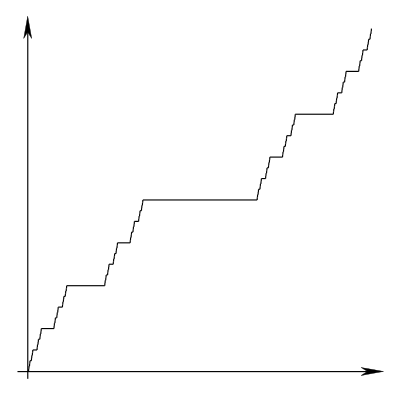

<h4>Generowanie Zmiennych.</h4>

- generujemy liczbe 0,$x_{1}$$x_{2}$$x_{3}$....$x_{n}$, gdzie $ x_{n}$ są liczbami z zbioru {0,2}, <br>  przykładowe liczby : 0.0202022, 0.002222 <br> długość takiej liczby jest określana przez rozdzielczość, która jest zadawana przez użytkownika

- następnie każdą cyfre dzielimy przez 3 z odpowiednią potęgą, tzn. pierwsza cyfra po przecinku jest dzielona przez 3, kolejna przez $3^{2}$ itd., <br> suma takich liczb jest naszą zmienną losową z rozkładu Cantora.

<h4>Porównanie dystrybuanty teoretycznej i empirycznej.</h4>


Dystrybuante teoretyczną obliczamy, wykorzystujemy poniższy algorytm:
- generujemy x (na przykład numpy.linspace)
- wyrażamy x jako liczbe w systemie trójkowym
- jeśli w naszej liczbie występuje przynajmniej jedna 1, to wszystkie cyfry po pierwszej jedynce zamieniamy na zera
- wszystkie dwójki zamieniamy na jedynki
- interpretujemy wynik jak liczbe dwójkową.

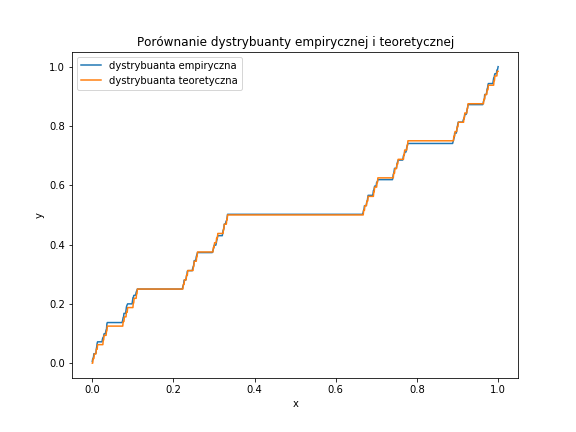

<h4>Funkcja charakterystyczna.</h4>

Do narysowania funkcji charakterystycznych wykorzystam funkcje $empchar$, którą programowaliśmy podczas jednych zajęć.

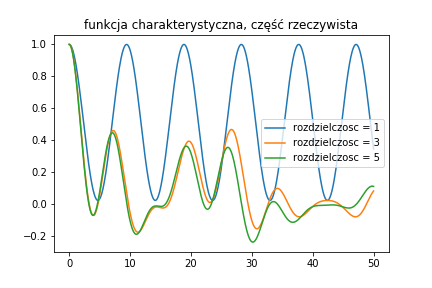

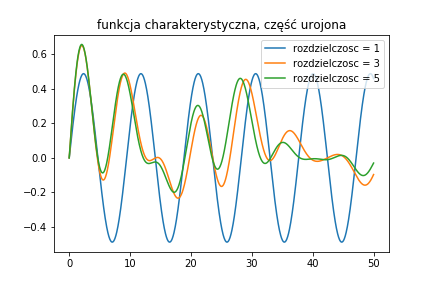

<h4>Uogólniona wersja generatora.</h4>

- Chcemy aby funkcja, jako argumenty przyjmowała podstawe $p$, oraz zbiór $A$, w którym będą cyfry z których "budujemy liczby".

In [81]:
generator(7,[0,1,4,6],10,10)

[0.12797388843084087,
 0.2833258251238854,
 0.9569567102142814,
 0.01790070463837347,
 0.08621407746772178,
 0.08169215207949068,
 0.6672814898554172,
 0.6675109860687297,
 0.8954347253270322,
 0.28452430534896167]

<h4>Porównanie funkcji charakterystycznych i dystrybuant w najciekawszych przypadkach: </h4>

- Funkcje charakterystyczne

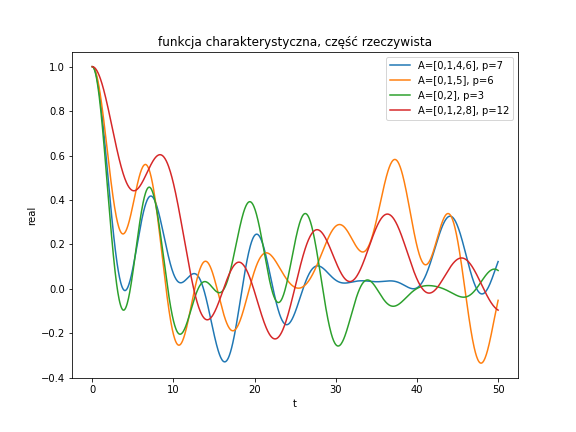

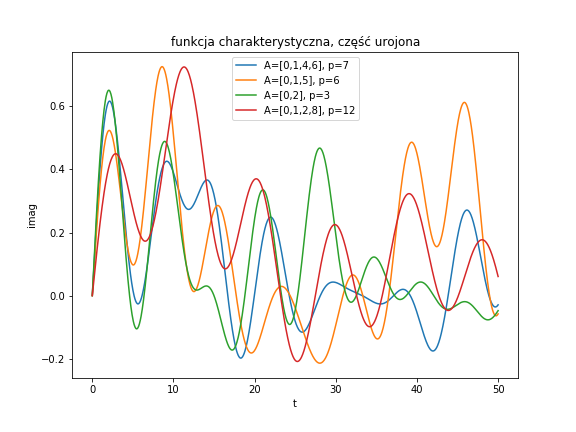

- Dystrybuanty

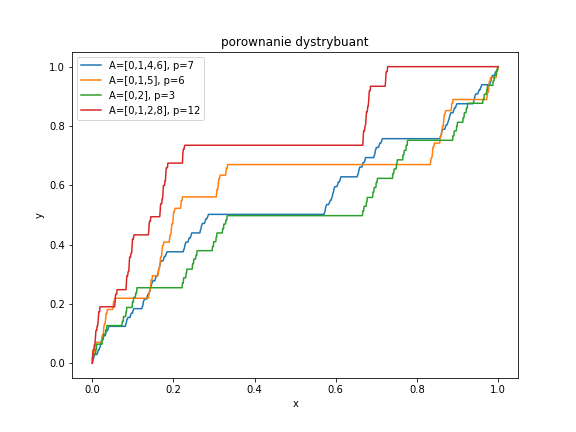

<h3>Kody</h3>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
def new_number_1(r):
    """
        r - długość generowanej liczby

        Funkcja generuje liczba postaci 0,x_1 x_2... x_n, 
        gdzie x_n jest cyfra ze zbioru {0,2}.
    """
    x =0
    for i in range(r):
        x += random.choice([0,2]) * 10**(-(i+1))
    return round(x,r)

In [3]:
new_number_1(5)

0.02222

In [4]:
def new_base_1(n):
    """
        n - liczba

        Funkcja oblicza sume ilorazu cyfr po przecinku i 3 podniesionej 
        do i-tej potęgi.
    """
    z = 0
    xz = list(format(n,'.8f'))
    
    for i in range(6):
        xz.append("0")
    
    for i in range(len(xz)-2):
        z = z + int(xz[i+2]) / 3**(i+1)
    return z

In [5]:
a = new_number_1(5)
new_base_1(a)

0.9135802469135802

In [6]:
def generator_1(r,N):
    """
        r - rozdzielczość
        N - wielkość tablicy którą chcemy otrzymać

        Funkcja generuje wektor liczb z rozkładu cantora.
    """
    aa,a = [],[]
    for i in range(N):
        aa.append(new_number_1(r))
    for i in range(len(aa)):
        a.append(new_base_1(aa[i]))
    return a

In [7]:
generator_1(5,10)

[0.9876543209876543,
 0.00823045267489712,
 0.24691358024691357,
 0.7736625514403291,
 0.6666666666666666,
 0.9629629629629629,
 0.2551440329218107,
 0.0,
 0.7654320987654321,
 0.9135802469135802]

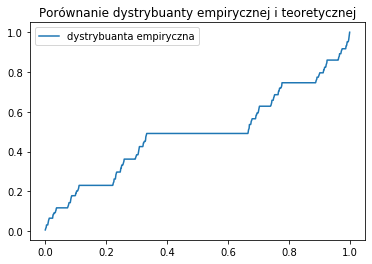

In [8]:
a = generator_1(10,1000)
t = np.linspace(0,1,1000)
ecdf_val = ECDF(a)
ecdf = ecdf_val(t)
plt.plot(t,ecdf,label='dystrybuanta empiryczna')
plt.title('Porównanie dystrybuanty empirycznej i teoretycznej')
plt.legend()
plt.show()

In [9]:
def dec_to_ternary(n):
    """
        Funkcja oblicza postać trójkową liczby n.
    """
    
    a = 0
    if n == int(n):
        n = n - 0.0000000001
    else:
        pass
    for i in range(10):
        m = int(n/(1/3**(i+1)))
        n = n - m * 1/3**(i+1)
        a = a + m* 10**(-(i+1))
    return round(a,10)

In [10]:
dec_to_ternary(0.23)

0.0200122

In [11]:
def transform_num(n):
    """
        Funckja odpowiednio zamienia cyfry w  liczbie n.
    """
    
    b = format(n,'.8f')
    c = list(b)
    d = 0
    if any(num == '1' for num in c):
        x = c.index('1')
        for i in range(len(c)-1-x):
            c[x+i+1]= '0'

    for i in range(len(c)):
        if c[i]=='2':
            c[i] = '1'
        else:
            pass
    for i in range(len(c)-2):
        d = d + int(c[i+2]) * 10**(-(i+1))
    return round(d,10)

In [12]:
a = dec_to_ternary(0.23)
b = transform_num(a)
b

0.01001

In [13]:
def transform_32(n):
    """
        Funkcja zamienia liczbe binarna n, na liczbe dziesietna
    """
    z = 0
    
    xz = list(format(n,'.8f'))
    
    for i in range(6):
        xz.append("0")
    
    for i in range(6):
        z = z + int(xz[i+2]) * 2**(-(i+1))
    return z

In [14]:
transform_32(b)

0.28125

In [15]:
def teoretyczna():
    """
        Funkcja generuje wartości dystrybuanty teoretycznej rozkladu Cantora
    """
    t = np.linspace(0,1,1000)
    vals = []

    for i in t:
        vals.append(transform_32(transform_num(dec_to_ternary(i))))
    return vals

In [16]:
teoretyczna()

[0.0,
 0.0,
 0.015625,
 0.015625,
 0.015625,
 0.03125,
 0.03125,
 0.03125,
 0.03125,
 0.03125,
 0.046875,
 0.046875,
 0.046875,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.078125,
 0.078125,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.09375,
 0.109375,
 0.109375,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.140625,
 0.140625,
 0.140625,
 0.15625,
 0.15625,
 0.15625,
 0.15625,
 0.15625,
 0.171875,
 0.171875,
 0.171875,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.203125,
 0.203125,
 0.21875,
 0.21875,
 0.21875,
 0.21875,
 0.21875,
 0.21875,
 0.234

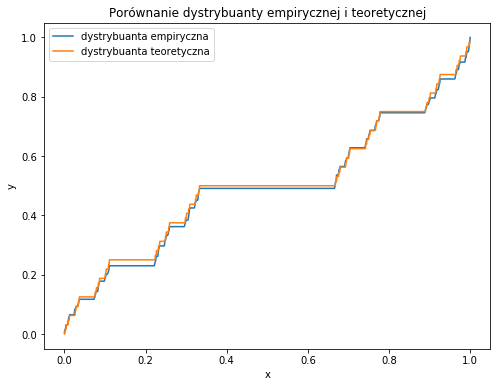

In [17]:
plt.figure(figsize=(8,6))
plt.plot(t,ecdf,label='dystrybuanta empiryczna')
plt.plot(t,teoretyczna(),label='dystrybuanta teoretyczna')
plt.title('Porównanie dystrybuanty empirycznej i teoretycznej')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [41]:
def empchar(X,t):
    """
        Funckja oblicza wartości funkcji charakterystycznej próby X w punkcie t.
    """
    vals = []
    z = complex(0,1)
    for i in X:
        vals.append(np.exp(z*i*t))
    t = sum(vals)
    
    return t/(len(X))

In [42]:
t = np.linspace(0,50,1000)

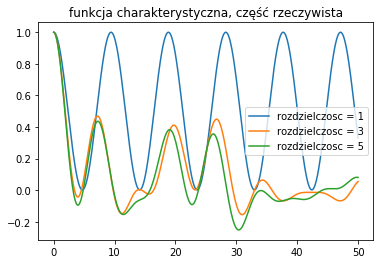

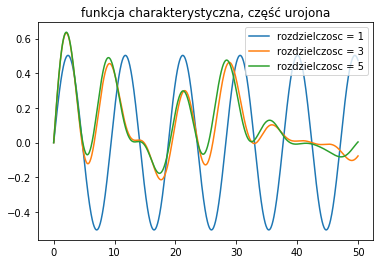

In [43]:
r = [1,3,5]
for i in r:
    plt.plot(t,empchar(generator_1(i,1000),t).real,label='rozdzielczosc = %d' %i)
plt.title('funkcja charakterystyczna, część rzeczywista')
plt.legend()
plt.figure()

for i in r:
    plt.plot(t,empchar(generator_1(i,1000),t).imag,label='rozdzielczosc = %d' %i)
plt.legend()
plt.title('funkcja charakterystyczna, część urojona')
plt.show()

In [44]:
def new_number(p,A,r):
    """
        p - podstawa
        A - zbiór cyfr, z ktorych tworzyc bedziemy nowe liczby
        r - rozdzielczość
        
        Funkcja tworzy losowe liczby np. dla p =2 , A = [3,4] x = 0,4334
    """
    x =0
    for i in range(r):
        x += random.choice(A) * 10**(-(i+1))
    return round(x,r)

In [45]:
a= new_number(4,[1,2,4],8)
a

0.21244112

In [46]:
def new_base(n,p):
    """
        n - liczba
        p - podstawa

        Funkcja oblicza sume ilorazów cyfr po przecinku i p podniesionej 
        do i-tej potęgi.
    """
    z = 0
    xz = list(format(n,'.8f'))
    
    for i in range(6):
        xz.append("0")
    
    for i in range(6):
        z = z + int(xz[i+2]) / p**(i+1)
    return z

In [47]:
new_base(a,4)

0.613525390625

In [48]:
def generator(p,A,r,N):
    """
        p - podstawa
        A - zbiór cyfr
        r - rozdzielczość
        N - wielkość tablicy którą chcemy otrzymać

        Funkcja generuje wektor liczb z rozkładu cantora.
    """
    aa,a = [],[]
    for i in range(N):
        aa.append(new_number(p,A,r))
    for i in range(len(aa)):
        a.append(new_base(aa[i],p))
    return a

In [49]:
generator(7,[0,1,4,6],10,10)

[0.6097799386310127,
 0.040807826670859935,
 0.860117808056167,
 0.13446778128160886,
 0.8976361890028814,
 0.877194026298566,
 0.8921027803041249,
 0.5895842718595142,
 0.5762479919081334,
 0.012137799726304516]

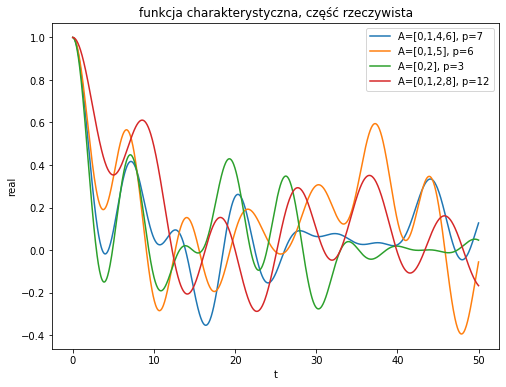

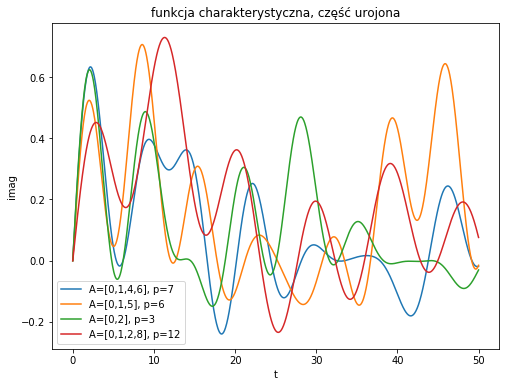

In [50]:
plt.figure(figsize=(8,6))
plt.plot(t,empchar(generator(7,[0,1,4,6],10,1000),t).real,label='A=[0,1,4,6], p=7')
plt.plot(t,empchar(generator(6,[0,1,5],10,1000),t).real,label='A=[0,1,5], p=6')
plt.plot(t,empchar(generator(3,[0,2],10,1000),t).real,label='A=[0,2], p=3')
plt.plot(t,empchar(generator(12,[0,1,2,8],10,1000),t).real,label='A=[0,1,2,8], p=12')
plt.xlabel("t")
plt.ylabel("real")
plt.title('funkcja charakterystyczna, część rzeczywista')

plt.legend()
plt.figure(figsize=(8,6))
plt.plot(t,empchar(generator(7,[0,1,4,6],10,1000),t).imag,label='A=[0,1,4,6], p=7')
plt.plot(t,empchar(generator(6,[0,1,5],10,1000),t).imag,label='A=[0,1,5], p=6')
plt.plot(t,empchar(generator(3,[0,2],10,1000),t).imag,label='A=[0,2], p=3')
plt.plot(t,empchar(generator(12,[0,1,2,8],10,1000),t).imag,label='A=[0,1,2,8], p=12')
plt.xlabel("t")
plt.ylabel("imag")
plt.legend()
plt.title('funkcja charakterystyczna, część urojona')
plt.show()

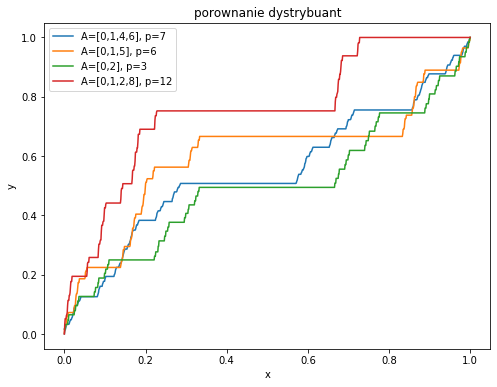

In [51]:
t=np.linspace(0,1,1000)
plt.figure(figsize=(8,6))
plt.plot(t,ECDF(generator(7,[0,1,4,6],8,10000))(t),label='A=[0,1,4,6], p=7')
plt.plot(t,ECDF(generator(6,[0,1,5],8,10000))(t),label='A=[0,1,5], p=6')
plt.plot(t,ECDF(generator(3,[0,2],8,10000))(t),label='A=[0,2], p=3')
plt.plot(t,ECDF(generator(12,[0,1,2,8],8,10000))(t),label='A=[0,1,2,8], p=12')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("porownanie dystrybuant")
plt.show()

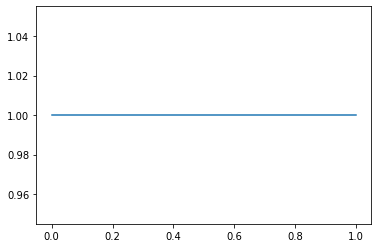

In [55]:
plt.plot(t,ECDF(generator(3,[0,2],0,10000))(t),label='A=[0,2], p=3')

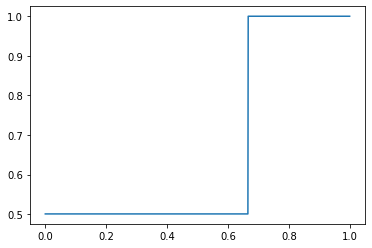

In [56]:
plt.plot(t,ECDF(generator(3,[0,2],1,10000))(t),label='A=[0,2], p=3')

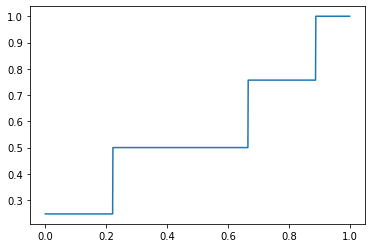

In [57]:
plt.plot(t,ECDF(generator(3,[0,2],2,10000))(t),label='A=[0,2], p=3')

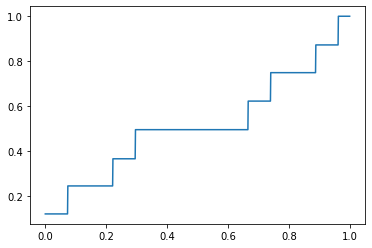

In [58]:
plt.plot(t,ECDF(generator(3,[0,2],3,10000))(t),label='A=[0,2], p=3')